In [52]:
import sys
import numpy as np
import pandas as pd
import seaborn as sb

In [53]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context
url = "https://itakigawa.github.io/data/hsi2020/data_impurities.csv"
mytable = pd.read_csv(url,index_col=0)

In [54]:
import matplotlib.pyplot as plt

for x in mytable.index:
  for y in mytable.columns:
    #print(f' host is {x} and guest is {y} with value {mytable.loc[x,y]}')
    if x != y:
      mytable.loc[x,y] += mytable.loc[x,x]
mytable

,Fe,Co,Ni,Cu,Ru,Rh,Pd,Ag,Ir,Pt,Au
Fe,-0.92,-0.87,-1.12,-1.05,-1.21,-1.46,-2.16,-1.75,-1.28,-2.01,-2.34
Co,-1.16,-1.17,-1.45,-1.33,-1.41,-1.75,-2.54,-2.08,-1.53,-2.36,-2.73
Ni,-1.20,-1.10,-1.29,-1.10,-1.43,-1.60,-2.26,-1.82,-1.43,-2.09,-2.42
Cu,-2.11,-2.07,-2.40,-2.67,-2.09,-2.35,-3.31,-3.37,-2.09,-3.00,-3.76
Ru,-1.20,-1.15,-1.40,-1.29,-1.41,-1.58,-2.23,-1.68,-1.39,-2.03,-2.25
Rh,-1.49,-1.39,-1.57,-1.29,-1.69,-1.73,-2.27,-1.66,-1.56,-2.08,-2.22
Pd,-1.46,-1.29,-1.33,-0.89,-1.59,-1.47,-1.83,-1.24,-1.30,-1.64,-1.66
Ag,-3.58,-3.46,-3.63,-3.83,-3.46,-3.44,-4.16,-4.30,-3.16,-3.80,-4.45
Ir,-1.90,-1.84,-2.06,-1.90,-2.02,-2.26,-2.84,-2.24,-2.11,-2.67,-2.85
Pt,-1.92,-1.77,-1.85,-1.53,-2.11,-2.02,-2.42,-1.81,-1.87,-2.25,-2.30


In [62]:
url2 = "https://itakigawa.github.io/data/hsi2020/features9.csv"
features = pd.read_csv(url2, index_col=0)
features

,name,Num of d-electrons,Bulk wigner-seitz radius,atomic number,atomic mass,period,electronegativity,Iionization energy(eV),_fusH,rho25
symbol,,,,,,,,,,
Fe,Iron,8,2.66,26,55.84500,4,1.83,7.9024,247.3,7.87
Co,Cobalt,9,2.62,27,58.93320,4,1.88,7.8810,272.5,8.86
Ni,Nickel,10,2.60,28,58.69340,4,1.91,7.6398,290.3,8.90
Cu,Copper,11,2.67,29,63.54600,4,1.90,7.7264,203.5,8.96
Ru,Ruthenium,8,2.79,44,101.07000,5,2.20,7.3605,381.8,12.10
Rh,Rhodium,9,2.81,45,102.90550,5,2.28,7.4589,258.4,12.40
Pd,Palladium,10,2.87,46,106.42000,5,2.20,8.3369,157.3,12.00
Ag,Silver,11,3.01,47,107.86820,5,1.93,7.5762,104.6,10.50
Ir,Iridium,9,2.84,77,192.21700,6,2.20,8.9670,213.9,22.50


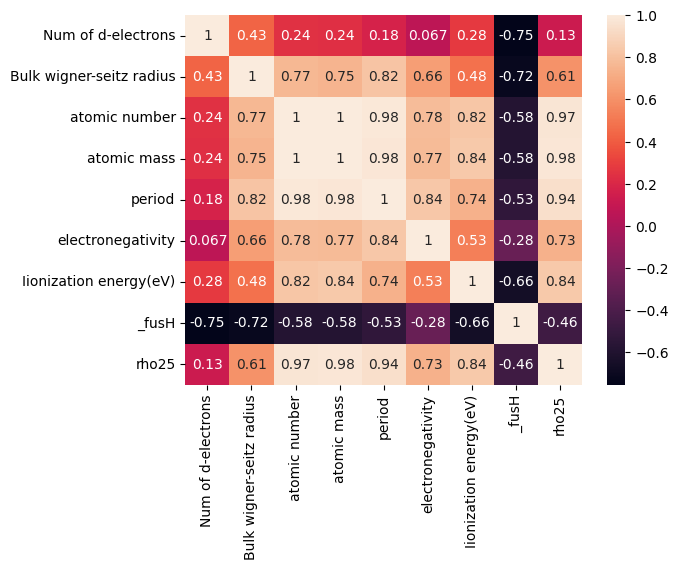

In [63]:
features.drop('name', axis='columns', inplace=True)
dataplot = sb.heatmap(features.corr(), annot = True)
plt.show()

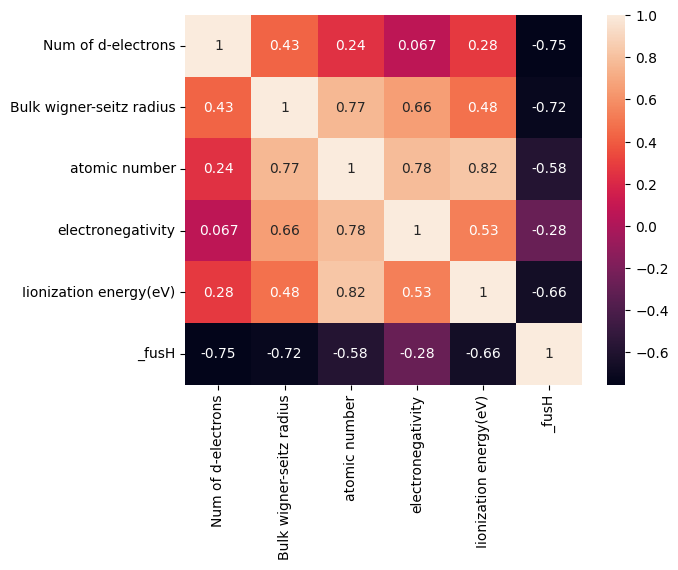

In [65]:
features.drop(['period', 'rho25', 'atomic mass'] , axis='columns', inplace=True)
dataplot = sb.heatmap(features.corr(), annot = True)
plt.show()

In [66]:
X = list()
y = list()

for x in mytable.index:
  for k in mytable.columns:
    vec_x = features.loc[x].to_numpy()
    vec_k = features.loc[k].to_numpy()
    #input we are giving
    x_val = np.concatenate((vec_x, vec_k))
    #output we want
    y_val = mytable.loc[x,k]
    X.append(x_val)
    y.append(y_val)

In [67]:
df = pd.DataFrame(X,columns=[f'x{i+1}' for i in range(12)])
df['y'] = y
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,8.0,2.66,26.0,1.83,7.9024,247.3,8.0,2.66,26.0,1.83,7.9024,247.3,-0.92
1,8.0,2.66,26.0,1.83,7.9024,247.3,9.0,2.62,27.0,1.88,7.8810,272.5,-0.87
2,8.0,2.66,26.0,1.83,7.9024,247.3,10.0,2.60,28.0,1.91,7.6398,290.3,-1.12
3,8.0,2.66,26.0,1.83,7.9024,247.3,11.0,2.67,29.0,1.90,7.7264,203.5,-1.05
4,8.0,2.66,26.0,1.83,7.9024,247.3,8.0,2.79,44.0,2.20,7.3605,381.8,-1.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,11.0,3.00,79.0,2.40,9.2255,64.6,10.0,2.87,46.0,2.20,8.3369,157.3,-3.39
117,11.0,3.00,79.0,2.40,9.2255,64.6,11.0,3.01,47.0,1.93,7.5762,104.6,-3.35
118,11.0,3.00,79.0,2.40,9.2255,64.6,9.0,2.84,77.0,2.20,8.9670,213.9,-2.58
119,11.0,3.00,79.0,2.40,9.2255,64.6,10.0,2.90,78.0,2.20,8.9588,113.6,-3.10


In [68]:
X = np.stack(X)
y = np.array(y)
X.shape, y.shape

((121, 12), (121,))

In [69]:
from sklearn.utils import shuffle
X,y = shuffle(X,y)
X_train, y_train = X[: -30,:], y[: -30]
X_test, y_test = X[-30 :,:], y[-30 :]

Model score 0.978401277483246
rmse is 0.12013912234626307


<BarContainer object of 12 artists>

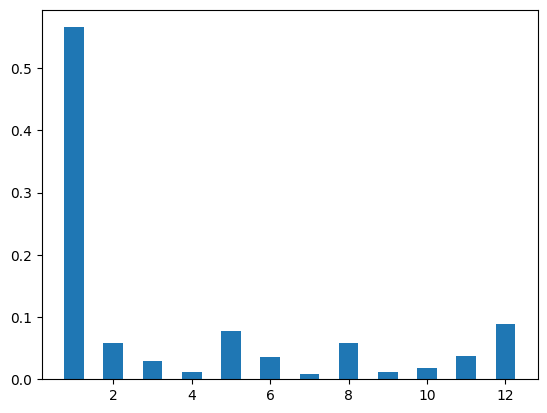

In [79]:
#Gradient Boost Regressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f'Model score {model.score(X_test, y_test)}')
rmse_te = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'rmse is {rmse_te}')
plt.bar(range(1,len(model.feature_importances_)+1), model.feature_importances_, width=0.5)

In [96]:
df_new = pd.DataFrame()
df_new = df.drop(['x2', 'x3','x4','x6','x7','x9','x10','x11'], axis='columns')
features_new = df_new.drop('y',axis='columns')

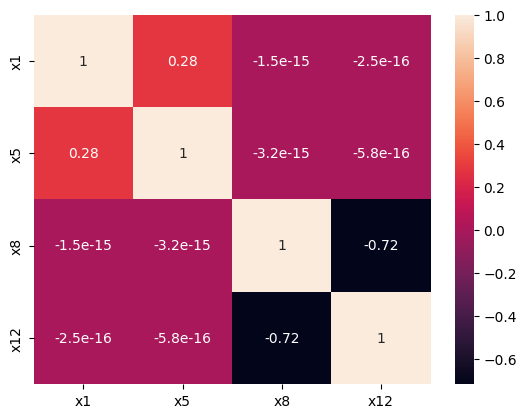

In [97]:
dataplot = sb.heatmap(features_new.corr(), annot = True)
plt.show()

In [89]:
X_new = features_new
y_new = df_new['y']

In [101]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new,test_size=0.25)
X_train_new.shape, X_test_new.shape

((90, 4), (31, 4))

In [109]:
#Gradient Boost Regressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor()
model.fit(X_train_new, y_train_new)
y_pred_train_new = model.predict(X_train_new)
y_pred_test_new = model.predict(X_test_new)
print(f'Model score {model.score(X_test_new, y_test_new)}')
rmse_te = mean_squared_error(y_test_new, y_pred_test_new, squared=False)
print(f'rmse is {rmse_te}')

Model score 0.9068922849271498
rmse is 0.14853300079823953
